# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [2]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [4]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [5]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [6]:
alt_18 = df_18.query('fuel in ["Electricity", "Ethanol"]').model.nunique()
alt_18

26

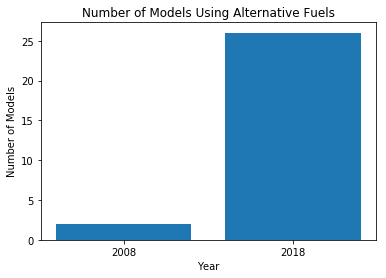

In [7]:
plt.bar(["2008","2018"],[alt_08, alt_18])
plt.title("Number of Models Using Alternative Fuels")
plt.xlabel('Year')
plt.ylabel("Number of Models");

In [8]:
total_08 = df_08.model.nunique()
total_18 = df_08.model.nunique()

In [9]:
prop_08 = alt_08 / total_08
prop_18 = alt_18 / total_18

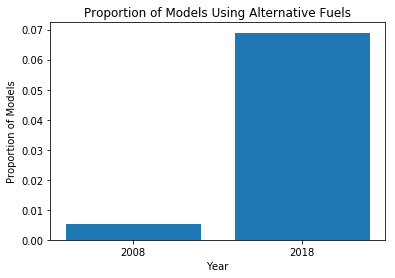

In [10]:
plt.bar(["2008","2018"],[prop_08, prop_18])
plt.title("Proportion of Models Using Alternative Fuels")
plt.xlabel('Year')
plt.ylabel("Proportion of Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [11]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [12]:
df_08.veh_class.value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [13]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [14]:
df_18.veh_class.value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

In [15]:
increse = veh_18 - veh_08
increse

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [16]:
increse.dropna(inplace=True)
increse

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

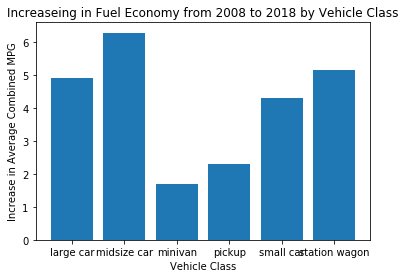

In [17]:
plt.bar(increse.index, increse)
plt.title("Increaseing in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Increase in Average Combined MPG");

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [18]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [19]:
smart_08 = df_08.query('smartway == "yes"')

In [20]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.268421,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,0.970027,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.000000,48.000000,45.000000,46.000000,10.000000


In [21]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [22]:
smart_18 = df_18.query('smartway in ["yes", "Elite"]')

In [23]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.0
mean,1.970588,4.0,7.0,53.235294,53.117647,53.000000,10.0
std,0.277859,0.0,0.0,25.914594,21.854297,24.065016,0.0
min,1.500000,4.0,7.0,26.000000,28.000000,26.000000,10.0
25%,2.000000,4.0,7.0,27.000000,33.000000,29.000000,10.0
50%,2.000000,4.0,7.0,48.000000,47.000000,46.000000,10.0
75%,2.000000,4.0,7.0,66.000000,68.000000,67.000000,10.0
max,2.500000,4.0,7.0,113.000000,99.000000,106.000000,10.0


### Q4: What features are associated with better fuel economy?

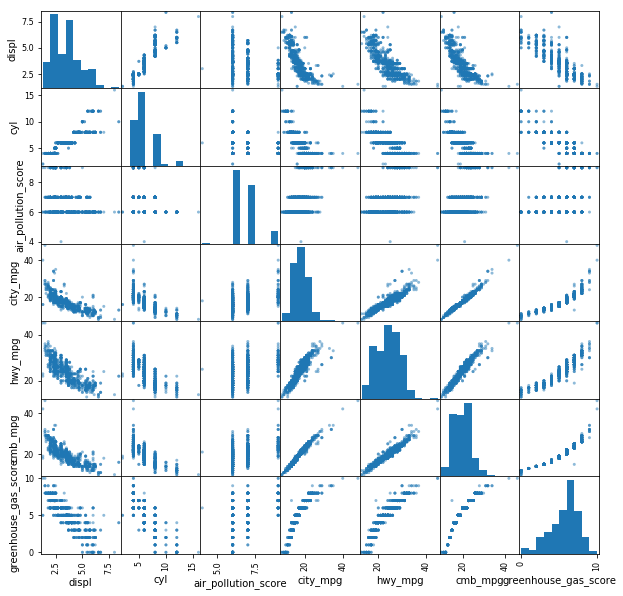

In [24]:
pd.plotting.scatter_matrix(df_08, figsize=(10,10));

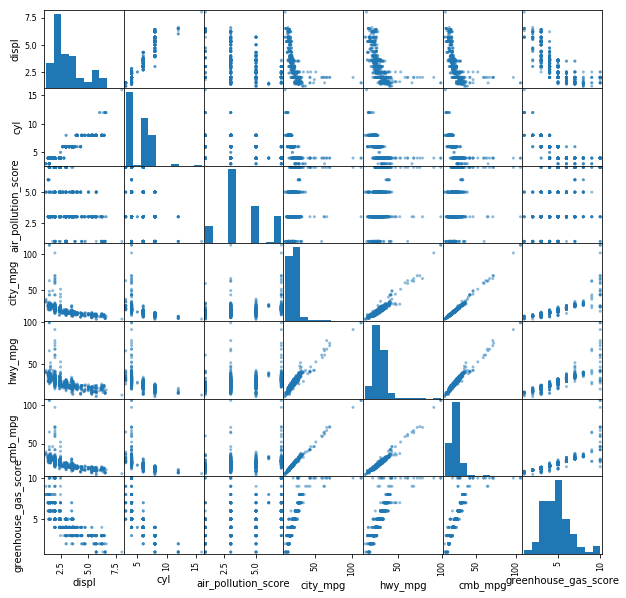

In [25]:
pd.plotting.scatter_matrix(df_18, figsize=(10,10));

In [26]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.926782,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.008858,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.000000,48.000000,45.000000,46.000000,10.000000


In [27]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
